# Single-Layer Perceptron - TensorFlow Keras

In this scenario of **Deep Learning** you will be constructing a **Single-Layer Perceptron using Tensorflow keras** model.The model will be trained to predict the subscription of term deposit by the client using the dataset provided. 

### Import the required packages

In [1]:
import io
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
import pandas as pd
import pylab 
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from IPython.display import Image
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score

Using TensorFlow backend.


### Load the Dataset

- Load the dataset banks_dataset.csv using pandas
- Print the first five rows of the dataset

In [2]:
# Dataset to be stored in a Pandas Dataframe
df = pd.read_csv('banks_dataset.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Run the below cell to get the categorical columns from the dataset

In [3]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
print(df[categorical_cols])

                 job   marital            education  default  housing  \
0          housemaid   married             basic.4y       no       no   
1           services   married          high.school  unknown       no   
2           services   married          high.school       no      yes   
3             admin.   married             basic.6y       no       no   
4           services   married          high.school       no       no   
5           services   married             basic.9y  unknown       no   
6             admin.   married  professional.course       no       no   
7        blue-collar   married              unknown  unknown       no   
8         technician    single  professional.course       no      yes   
9           services    single          high.school       no      yes   
10       blue-collar   married              unknown  unknown       no   
11          services    single          high.school       no      yes   
12       blue-collar    single          high.school

### Preprocess
- Instantiate the labelencoder object
- Apply le on the categorical feature columns
- Drop the Nan values and give parameter as inplace=True
- Print the first 10 rows of the dataframe df

In [6]:
le = LabelEncoder()
for variable in categorical_cols:
    df[variable]=le.fit_transform(df[variable])
    print(variable)

#df[categorical_cols] =



job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Standard Scaler

- consider column "y"  as label (Y) using dataframe df
- drop the column "y"  from features X using dataframe df
- Create an object of standard scaler using scalers and fit transform using X.


In [8]:
Y=df['y']

X=df.drop('y',axis=1)

scalers=StandardScaler()

X=scalers.fit_transform(X)


### Split the Dataset
- Split the data with the train_test_split function of sklearn with parameters test_size=0.2 and random_state=500

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

### Create the SLP model

-   Construct a fully-connected network structure defined using dense class
-   Create a sequential model
-   Use adam optimizer, binary cross entropy and accuracy as metrics for compiling the model

    -   The model expects rows of data with 20 variables (the input_dim=20 argument)
    
    -   The hidden layer has 40 nodes and uses the relu activation function.
    
    -   The output layer has one node and uses the sigmoid activation function.

In [10]:
model = Sequential()
model.add(Dense(40, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


### Fit and Predict the model

- fit the model with X_train, y_train, epochs=50, batch_size=50,shuffle=true,validation_split=0.2,verbose=1 and save it in history

- Predict the classes for X_test using the compiled model and save it in y_pred.


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=50,shuffle=True,validation_split=0.2,verbose=1)


y_pred = model.predict(X_test)


Instructions for updating:
Use tf.cast instead.
Train on 26360 samples, validate on 6590 samples
Epoch 1/50
26360/26360 [==============================] - 1s 39us/step - loss: 0.2759 - accuracy: 0.8895 - val_loss: 0.2231 - val_accuracy: 0.9021
Epoch 2/50
26360/26360 [==============================] - 1s 31us/step - loss: 0.2048 - accuracy: 0.9095 - val_loss: 0.2139 - val_accuracy: 0.9052
Epoch 3/50
26360/26360 [==============================] - 1s 29us/step - loss: 0.1966 - accuracy: 0.9121 - val_loss: 0.2084 - val_accuracy: 0.9071
Epoch 4/50
26360/26360 [==============================] - 1s 28us/step - loss: 0.1920 - accuracy: 0.9120 - val_loss: 0.2063 - val_accuracy: 0.9074
Epoch 5/50
26360/26360 [==============================] - 1s 30us/step - loss: 0.1896 - accuracy: 0.9140 - val_loss: 0.2043 - val_accuracy: 0.9079
Epoch 6/50
26360/26360 [==============================] - 1s 31us/step - loss: 0.1879 - accuracy: 0.9145 - val_loss: 0.2033 - val_accuracy: 0.9082
Epoch 7/50
26360/2636

### Run the below cell to visualise the plot of model history parameters

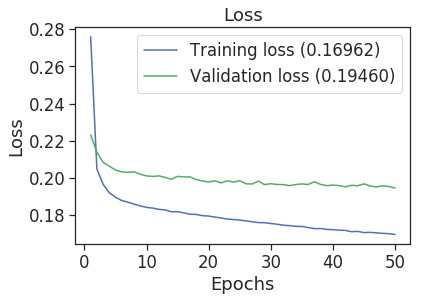

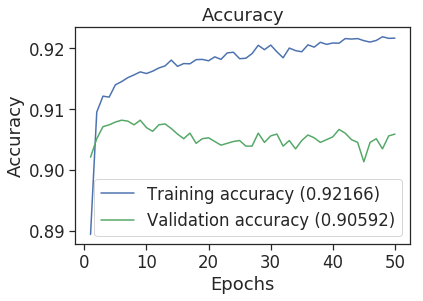

In [12]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
# Calling the function
plot_history(history)

#### Run the below cell to know the metrics and classification report

In [13]:



def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(true_labels, predicted_labels)))
    print('Precision: {:2.2%} '.format(metrics.precision_score(true_labels, predicted_labels, average='weighted')))
    print('Recall:    {:2.2%} '.format(metrics.recall_score(true_labels, predicted_labels, average='weighted')))
    print('F1 Score:  {:2.2%} '.format(metrics.f1_score(true_labels, predicted_labels, average='weighted')))
                        

def display_confusion_matrix(true_labels, predicted_labels):
    
    
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    tn, fp, fn, tp=metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels).ravel()
    


    cm_frame = pd.DataFrame(data=cm, 
                            columns=[0,1], 
                            index=[0,1]) 
    cm_frame1 = pd.DataFrame(data=cm, 
                            columns=["no","yes"], 
                            index=["no","yes"]) 
    print(cm_frame) 
    print(cm_frame1)
   
    
    
def display_classification_report(true_labels, predicted_labels):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels)

def get_results(model,data, true_labels, predicted_labels, results=None, reasume=False):
  
    display_model_performance_metrics(true_labels, predicted_labels = predicted_labels)
    

    

get_results(model, X_test, y_test,y_pred.round(),results=None,reasume=False)



Model Performance metrics:
------------------------------
Accuracy:  91.31% 
Precision: 90.35% 
Recall:    91.31% 
F1 Score:  90.55% 

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      7306
          1       0.67      0.45      0.54       932

avg / total       0.90      0.91      0.91      8238


Prediction Confusion Matrix:
------------------------------
      0    1
0  7100  206
1   510  422
       no  yes
no   7100  206
yes   510  422


### Run the below cell to save the model

In [14]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")